# Metabolic Flux Analysis Exercise

## Metabolic Flux Analysis of *Saccharomyces cerevisiae*

We will here consider production of ethanol, which is one of the largest biotech processes as ethanol is used as an environmentally friendly fuel in the US and in Brazil. In this process glucose is the often-applied carbon source (the substrate), and this is taken up by the cells and via the glycolysis converted into ethanol by substrate level phosphorylation. However, glucose is also used for synthesis of biomass and glucose may also be oxidized completely to carbon dioxide in the TCA cycle if there is oxygen present and consequently oxidative metabolism is allowed – often referred to as respiration. If there are completely anaerobic conditions, the TCA cycle is not fully operating, but other by-products are formed, e.g. glycerol and succinate. The formation of these compounds results in a loss of carbon, and clearly it would have been more interesting if the carbon ending up in these compounds were redirected to ethanol – the main product.

In order to understand how the carbon is distributed to the different pathways (or metabolic routes) inside the cells, Metabolic Flux Analysis (MFA) can be applied. With this concept it is possible to calculate the fluxes through the different branches of the metabolic network, e.g. how much carbon is directed towards ethanol and how much goes to biomass. If these fluxes are calculated when the cells are grown at different growth conditions, it is possible to gain some understanding about how the fluxes are regulated (how are the enzymes catalysing the many individual reactions regulated).

Furthermore, through calculating the fluxes in a normal strain and a strain that has been genetically engineered, e.g. a gene encoding a specific enzyme in glycolysis is over-expressed, it is possible to gain insight into how the flux towards ethanol can be improved. As the flux towards ethanol is identical with the productivity one hereby directly obtains insight into how the productivity can be improved.

Furthermore, the ratio between the flux towards ethanol and the flux into the glycolysis (which equals the glucose uptake rate) is identical to the yield of product on the raw material, and flux analysis therefore also allows for evaluation of how the yield is effected when specific mutations are introduced. This interaction between flux calculation and application of directed genetic modifications for improving ethanol production is an example of metabolic engineering.

In practice a rather detailed mathematical model is needed to calculate the fluxes, but the concept can be illustrated with a very simple model shown in Fig. 1. In this simple model we have lumped many reactions inside the cells into a few overall reactions. Thus, all the reactions in the glycolysis have been lumped into a single overall reaction. Also the many reactions of the TCA cycle and the oxidative phosphorylation have been lumped into a single reaction. Finally the very large number of reactions behind cell growth is lumped into a single overall reaction. For many cases it is reasonable to lump many sequential reactions into a single overall reaction as pseudo steady state conditions may be assumed.

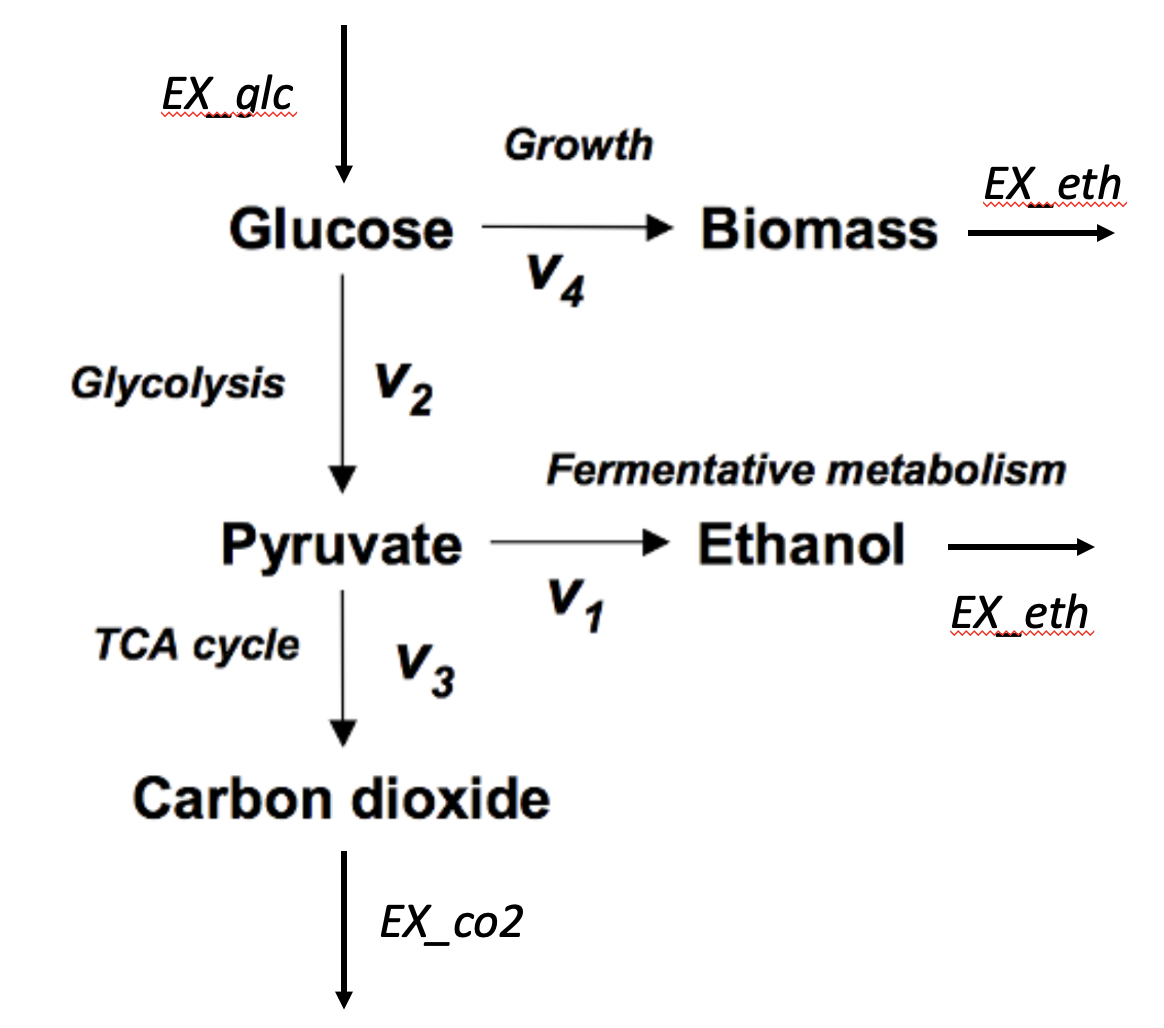

*Fig. 1* Conceptual model for the main pathways in *Saccharomyces cerevisiae*.

***
**A.** Fig. 1 is just a schematic figure without information about stoichiometry. By looking into the reactions corresponding to the different rates, $v_1$-$v_4$, you should now find the stoichiometric expressions to use in the model. You can do this using pathway databases like KEGG for example.
1. Write the stoichiometric expressions for the two reactions catalysed by the enzymes pyruvate decarboxylase and alcohol dehydrogenase that are responsible for conversion of pyruvate to ethanol in Saccharomyces cerevisiae. (You can write simplified stoichiometric expressions using the names of compounds and not molecular formulas).
What stoichiometric expression will be the result if you neglect the co-factors and lump the two reactions?
2. Do this also for the reactions from glucose to pyruvate. What will the lumped overall reaction look like? (Again co-factors and ADP/ATP can be left out)
3. Also in a similar fashion find the lumped stoichiometry for the TCA cycle.

Put your lumped reactions in text form here (you can double click the cell to edit it):
1. -pyruvate + ethanol + CO2 = 0 (Fermentative metabolism)
2. -glucose + 2 pyruvate = 0 (Glycolysis)
3. -pyruvate + 3 CO2 = 0 (TCA cycle)
***

In reality NADH and FADH2 are formed in the glycolysis and the TCA cycle, and these co-factors are reoxidized to NAD+ and FAD+ in the oxidative phosphorylation, where oxygen serves as the final electron acceptor. In this process Gibbs free energy in the form of ATP is generated, and this is used for biomass growth. However, in this simple model we will not consider these co-factors.
The lumped reactions you have found above will be reactions

1. (pyruvate conversion to ethanol)
2. (glucose to pyruvate) and 
3. (TCA cycle) in our simplified model.

Finally to get a stoichiometric expression for biomass formation (the reaction with rate v4 in Fig 1) it is assumed that biomass is formed with the overall reaction

\begin{equation*}
- glucose + a \cdot biomass = 0
\end{equation*}

where a is a stoichiometric coefficient. The value of a is typically found to be 0.13 g DW/mmol glucose.

The model is clearly very simplified. We have e.g. left out ATP which is very important in linking together the different parts of the metabolism, e.g. ATP is formed in glycolysis and the TCA cycle + oxidative phosphorylation and ATP is used for biomass synthesis. Furthermore, we have assumed that there are no other co-factors involved in the overall synthesis of biomass. This simplification is, however, necessary in a simple example, as extension of just of few more details will result in a substantial increase in the complexity of the model, and as mentioned above the aim is here simply to illustrate the concept.

Inside the cell there will be perfect balancing on the formation and consumption of all intracellular metabolites, i.e. the pseudo-steady state assumption. There may, when the cells changes its growth conditions, be a rapid change in the level of intracellular metabolites inside the cell, but when the level has changed then there will again be a balancing of formation and consumption. This balancing allows us to lump reactions into a few overall reactions.

***
**B.** Write a balance for pyruvate. What constraint on the reaction rates (or fluxes) is a result of the pyruvate balancing?

*Put your solution here (you can double click the cell to edit it).*

$v_1 + v_3 = 2 v_2$
***

***
**C.** Encode the stoichiometry of the model in a matrix $\mathbf{S}$ such that $\mathbf{S}\mathbf{v} = \mathbf{0}$ where $\mathbf{v}$ is a vector of the reaction rates [v1, v2, v3, v4, EX_co2, EX_glc, EX_eth, EX_x] (in that order please). Use `numpy.array` to define $\mathbf{S}$. Find the expressions for the net formation rates of all the metabolites (or compounds) in the model.

In [144]:
# Put your solution here in code
import numpy as np

S = np.array([[ 0.  , -1.  ,  0.  , -1.  ,  0.  , -1.  ,  0.  ,  0.  ],
              [ 1.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  , -1.  ,  0.  ],
              [ 1.  ,  0.  ,  3.  ,  0.  , -1.  ,  0.  ,  0.  ,  0.  ],
              [ 0.  ,  0.  ,  0.  ,  0.13,  0.  ,  0.  ,  0.  , -1.  ],
              [-1.  ,  2.  , -1.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ]])

We can use the symbolic math library `sympy` to carry out $\mathbf{S}\mathbf{v} = \mathbf{0}$ symbolically to check if the balances are correct.

In [145]:
from sympy import Equality, Matrix, symbols
v = Matrix(symbols("v1:5") + symbols("EX_co2, EX_glc, EX_{eth}, EX_x"))

v is the vector of all fluxes

In [146]:
v

Matrix([
[      v1],
[      v2],
[      v3],
[      v4],
[  EX_co2],
[  EX_glc],
[EX_{eth}],
[    EX_x]])

In [147]:
Equality(Matrix(S) * v, 0, evaluate=False)

Eq(Matrix([
[-1.0*EX_glc - 1.0*v2 - 1.0*v4],
[       -1.0*EX_{eth} + 1.0*v1],
[-1.0*EX_co2 + 1.0*v1 + 3.0*v3],
[          -1.0*EX_x + 0.13*v4],
[    -1.0*v1 + 2.0*v2 - 1.0*v3]]), 0)

Do the balances look correct?

***
**D.** Using numpy's `matrix_rank` function and getting the dimensions of $\mathbf{S}$ through`S.shape`, calculate the degrees of freedom in order to determine how many reactions need to be measured in order to fully resolve the system.

In [132]:
from numpy.linalg import matrix_rank

In [133]:
S.shape

(5, 8)

In [134]:
S.shape[1] - matrix_rank(S)

3

***
Now lets say that only three rates are measured: glucose, ethanol and biomass. Lets consider some typical experimental values:

| Growth conditions | $Y_{sx}$              | $Y_{sp}$                        | $r_{glc}$                |
|-------------------|---------------------|-------------------------------|--------------------------|
| Aerobic           | 0.09 g DW/mmol glucose | 0 mmol ethanol/mmol glucose     | -1.1 mmol glucose/g DW/h |
| Anaerobic         | 0.018 g DW/mmol glucose | 1.723 mmol ethanol/mmol glucose | -5.6 mmol glucose/g DW/h |

***
**E.** Why do you think that the yield coefficient for biomass on glucose (Ysx) is lower at
anaerobic conditions than at aerobic conditions?

**Answer: A lot less ATP is produced during anaerobic conditions.**
***

***
**F.** Calculate $r_{X}$ and $r_{EtOH}$ and use these to calculate all remaining fluxes in the network at the two different growth conditions. What is the flux through the TCA cycle at anaerobic conditions? Can this explain the low biomass yield at anaerobic conditions?

**Hints**:

1. Remember $\mathbf{v}_c = -\mathbf{S}_c^{-1} \mathbf{S}_m \mathbf{v}_m$
2. `np.linalg.inv` inverts a matrix
3. You can get the dot product of a matrix and vector like this: `S.dot(v)`
4. You can use slicing to extract a specific part of a matrix, e.g., `S[:, 0:2]` will extract the first two columns (remember that indices in Python start at 0 and that the 2 (so third column) is not included in `0:2`)

**Answers:**
$Y_{sp} = \frac{r_{eth}}{|r_{glc|}}$. Hence $r_{eth}$ can be calculated from the measured values given. The same applies to $r_x$.

#### Aerobic

In [162]:
# Aerobic
S_c = S[:, 0:5]
S_m = S[:, 5:]
v_m = np.array([-1.1, 0*1.1, 0.09*1.1]) # r_glc, r_eth = Y_se * |r_glc|, r_x = Y_sx * |r_glc|

# Assign the final solution here (replace _ with the final step, not a number)

v_c = -np.linalg.inv(S_c).dot(S_m.dot(v_m))

In [163]:
v_c

array([-0.        ,  0.33846154,  0.67692308,  0.76153846,  2.03076923])

In [164]:
list(zip(np.concatenate([v_c, v_m]), v))

[(-0.0, v1),
 (0.3384615384615386, v2),
 (0.6769230769230772, v3),
 (0.7615384615384615, v4),
 (2.0307692307692315, EX_co2),
 (-1.1, EX_glc),
 (0.0, EX_{eth}),
 (0.099, EX_x)]

#### Anaerobic

In [165]:
S_c = S[:, 0:5]
S_m = S[:, 5:]
v_m = np.array([-5.6, 1.723*5.6 , 0.018*5.6]) # r_glc, r_eth = Y_se * |r_glc|, r_x = Y_sx * |r_glc|

# Assign the final solution here (replace _ with the final step, not a number)

v_c = -np.linalg.inv(S_c).dot(S_m.dot(v_m))

In [166]:
v_c

array([9.64880000e+00, 4.82461538e+00, 4.30769231e-04, 7.75384615e-01,
       9.65009231e+00])

In [167]:
list(zip(np.concatenate([v_c, v_m]), v))

[(9.6488, v1),
 (4.8246153846153845, v2),
 (0.0004307692307694566, v3),
 (0.7753846153846152, v4),
 (9.6500923076923, EX_co2),
 (-5.6, EX_glc),
 (9.6488, EX_{eth}),
 (0.10079999999999999, EX_x)]

***
In the network of above we have as before mentioned neglected co-factors like NADH, NADPH and ATP. If these are included the model complexity will increase, but at the same time a there will be introduced additional constraints in the form of balances for these compounds (just like for pyruvate in the here discussed model). If one applies much more complex models it is possible to calculate the fluxes through many different pathways using exactly the same concept as illustrated here, and only using measurements of a few fluxes in and out of the cell, e.g. glucose uptake rate and product secretion rates. In the present example it is actually possible to measure all the fluxes (we could have added measurements of carbon dioxide), but in general it is not possible to measure all fluxes through the different pathways inside the cell, and here the concept of metabolic flux analysis is very valuable for evaluation of how the cell operates at different growth conditions.